Standard Imports:

In [22]:


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from flask import Flask,request,jsonify,render_template
import pickle


### Task 1: About the Data
***

![Alt text](https://farm4.staticflickr.com/3585/3299226824_4637597b74_z_d.jpg "Cards by bl0ndeeo2, Creative Commons License (https://flic.kr/p/62xpc7) ")

The [dataset](http://archive.ics.uci.edu/ml/datasets/Poker+Hand) we'll be exploring in this post is the Poker Hand data from the UCI Machine Learning Repository.

Each record in the dataset is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. The target column describes the hand, with the possibilities being:    

    0: Nothing in hand; not a recognized poker hand     
    1: One pair; one pair of equal ranks within five cards     
    2: Two pairs; two pairs of equal ranks within five cards     
    3: Three of a kind; three equal ranks within five cards     
    4: Straight; five cards, sequentially ranked with no gaps     
    5: Flush; five cards with the same suit     
    6: Full house; pair + different rank three of a kind     
    7: Four of a kind; four equal ranks within five cards     
    8: Straight flush; straight + flush     
    9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush     
    
The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (one for each suit).

In [23]:
poker_df = pd.read_csv('data/poker-hand-testing.data')

### Task 2: Separate the Data into Features and Targets
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [24]:
poker_df.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
5,2,6,4,11,2,3,4,9,1,7,0
6,3,2,4,9,3,7,4,3,4,5,0
7,4,4,3,13,1,8,3,9,3,10,0
8,1,9,3,8,4,4,1,7,3,5,0
9,4,7,3,12,1,13,1,9,2,6,0


In [25]:
# Manually label the columns and classes based on the dataset description from the UCI Repository
poker_df.columns = [ 'first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
 'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = [ 'zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
 'four_of_a_kind', 'straight_flush', 'royal_flush']


# Separate the data into features (X) and targets (y)
x = poker_df.iloc[:,0:9]
y = poker_df.hand


### Task 3: Evaluating Class Balance
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

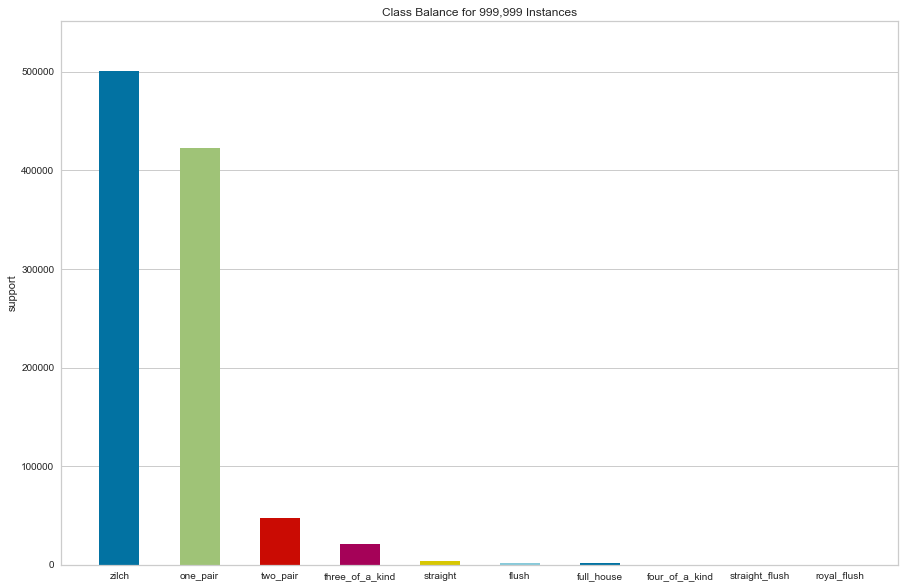

In [26]:

from yellowbrick.classifier import ClassBalance,ROCAUC,ClassificationReport,ClassPredictionError
balance = ClassBalance(size=(1080,720),labels=labels)

balance.fit(y)
balance.poof();


app=Flask(__name__)

@app.route("/sample")
def running():
    return balance.poof();



### Task 4: Upsampling from Minority Classes
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [27]:
poker_df.loc[poker_df['hand']>=5,'hand']=5
y=poker_df.hand

labels=['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

### Task 5: Training the Random Forests Classifier
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

clf = RandomForestClassifier(n_estimators=100,
                            class_weight='balanced',
                            n_jobs=-1)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### Task 6: Classification Accuracy
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [29]:
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.67749


### Task 7: ROC Curve and AUC 
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

C:\ProgramData\Anaconda3\envs\tmp36\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


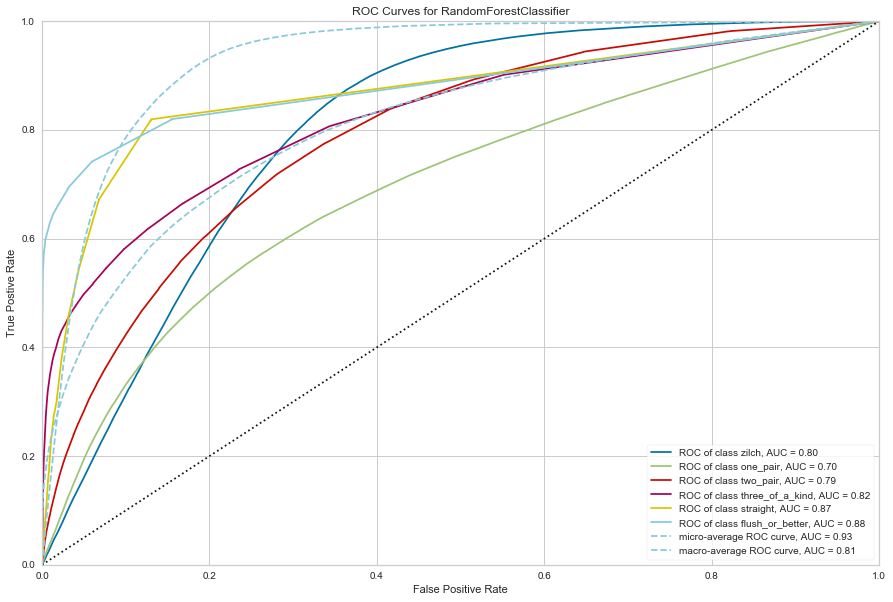

In [30]:
#from yellowbrick.classifier import ROCAUC

rocauc = ROCAUC(clf,size=(1080,720),classes=labels)

rocauc.score(x_test,y_test)
rocauc.poof();

 ### Task 8: Classification Report Heatmap
 ***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

C:\ProgramData\Anaconda3\envs\tmp36\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


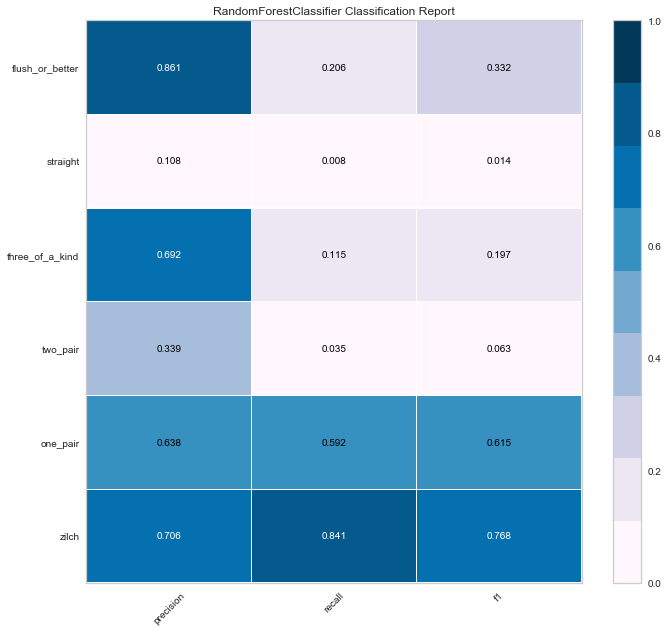

In [31]:
report =ClassificationReport(clf,size=(720,640),classes=labels,cmap='PuBu')
report.score(x_test,y_test)
report.show()

### Task 9: Class Prediction Error
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

C:\ProgramData\Anaconda3\envs\tmp36\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


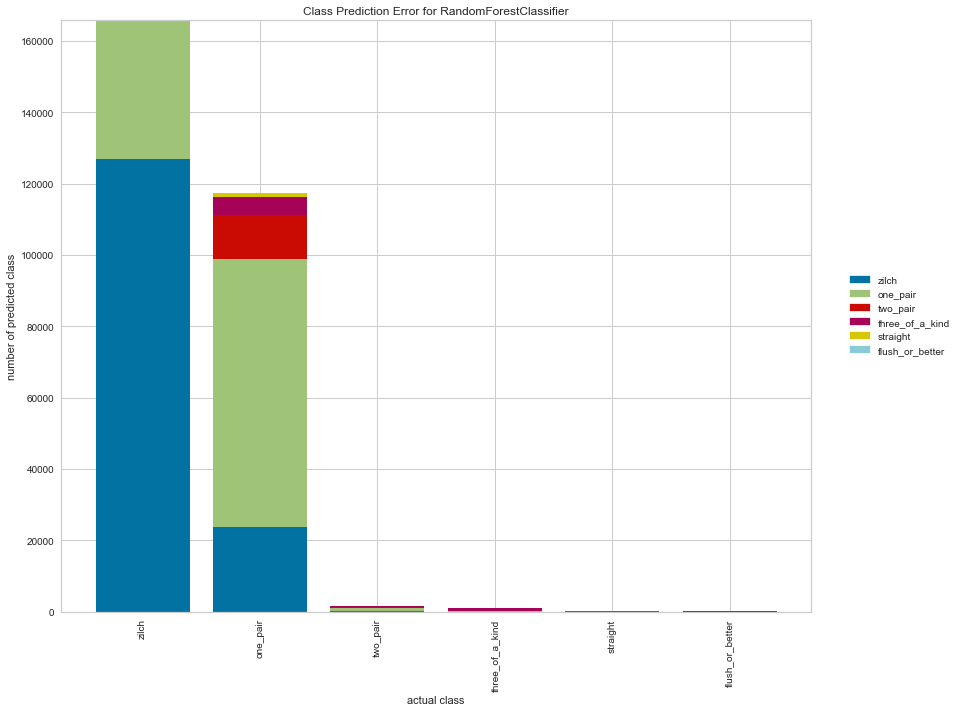

In [32]:
error = ClassPredictionError(clf,size=(1080,720),classes=labels)
error.score(x_test,y_test)
error.poof()